# **Convolutional Layers in PyTorch**

To Create a convolutional layers in Pytorch, you msut first import the necessary module.

In [1]:
import torch.nn as nn
# nn : The nn package defines a set of Modules, which you can think of as a neural network layer that produces output from input and may have some trainable weights.

Then, there is a two part process to defining a convolutional layer and defining the feedforward behavior of a model (how an input moves through the layers of a network). First, you must define a Model class and fill in # two functions.



# init
You can define a convolutional layer in the __init__ function of by using the following format

self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)


# forward

Then, you refer to that layer in the forward function! Here, I am passing in an input image x and applying a ReLU function to the output of this layer.

x = F.relu(self.conv1(x))




# Arguments
You must pass the following arguments:

in_channels - The number of inputs (in depth), 3 for an RGB image, for example.






out_channels - The number of output channels, i.e. the number of filtered "images" a convolutional layer is made of or the number of unique, convolutional kernels that will be applied to an input.





kernel_size - Number specifying both the height and width of the (square) convolutional kernel.





There are some additional, optional arguments that you might like to tune:




stride - The stride of the convolution. If you don't specify anything, stride is set to 1.





padding - The border of 0's around an input array. If you don't specify anything, padding is set to 0.
NOTE: It is possible to represent both kernel_size and stride as either a number or a tuple.

# Pooling Layers
Pooling layers take in a kernel_size and a stride. Typically the same value as is the down-sampling factor. For example, the following code will down-sample an input's x-y dimensions, by a factor of 2:

self.pool = nn.MaxPool2d(2,2)


# forward

Here, we see that poling layer being applied in the forward function.

x = F.relu(self.conv1(x))
x = self.pool(x)

# Convolutional Example #1
Say I'm constructing a CNN, and my input layer accepts grayscale images that are 200 by 200 pixels (corresponding to a 3D array with height 200, width 200, and depth 1). Then, say I'd like the next layer to be a convolutional layer with 16 filters, each filter having a width and height of 2. When performing the convolution, I'd like the filter to jump two pixels at a time. I also don't want the filter to extend outside of the image boundaries; in other words, I don't want to pad the image with zeros. Then, to construct this convolutional layer, I would use the following line of code:

self.conv1 = nn.Conv2d(1, 16, 2, stride=2)





# Convolutional Example #2
Say I'd like the next layer in my CNN to be a convolutional layer that takes the layer constructed in Example 1 as input. Say I'd like my new layer to have 32 filters, each with a height and width of 3. When performing the convolution, I'd like the filter to jump 1 pixel at a time. I want this layer to have the same width and height as the input layer, and so I will pad accordingly. Then, to construct this convolutional layer, I would use the following line of code:

self.conv2 = nn.Conv2d(16, 32, 3, padding=1)

For more Detailing refer this link :



https://iamaaditya.github.io/2016/03/one-by-one-convolution/


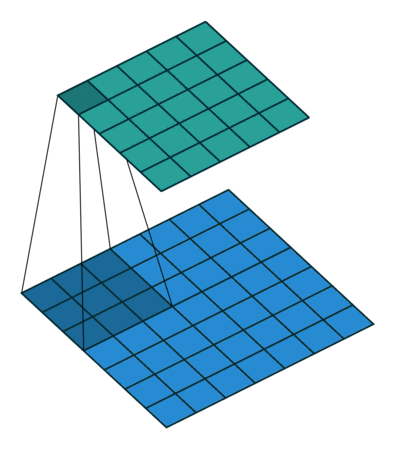

# Sequential Models
We can also create a CNN in PyTorch by using a Sequential wrapper in the __init__ function. Sequential allows us to stack different types of layers, specifying activation functions in between!



def __init__(self):




super(ModelName, self).__init__()







self.features = nn.Sequential(






              nn.Conv2d(1, 16, 2, stride=2),
              nn.MaxPool2d(2, 2),
              nn.ReLU(True),

              nn.Conv2d(16, 32, 3, padding=1),
              nn.MaxPool2d(2, 2),
              nn.ReLU(True)
         )









# Formula: Number of Parameters in a Convolutional Layer
The number of parameters in a convolutional layer depends on the supplied values of filters/out_channels, kernel_size, and input_shape. Let's define a few variables:

K - the number of filters in the convolutional layer




F - the height and width of the convolutional filters




D_in - the depth of the previous layer



Notice that K = out_channels, and F = kernel_size. Likewise, D_in is the last value in the input_shape tuple, typically 1 or 3 (RGB and grayscale, respectively).





Since there are F*F*D_in weights per filter, and the convolutional layer is composed of K filters, the total number of weights in the convolutional layer is K*F*F*D_in. Since there is one bias term per filter, the convolutional layer has K biases. Thus, the __ number of parameters__ in the convolutional layer is given by K*F*F*D_in + K.

# Formula: Shape of a Convolutional Layer
The shape of a convolutional layer depends on the supplied values of kernel_size, input_shape, padding, and stride. Let's define a few variables:

K - the number of filters in the convolutional layer






F - the height and width of the convolutional filters






S - the stride of the convolution





P - the padding




W_in - the width/height (square) of the previous layer




Notice that K = out_channels, F = kernel_size, and S = stride. Likewise, W_in is the first and second value of the input_shape tuple.

The depth of the convolutional layer will always equal the number of filters K.

The spatial dimensions of a convolutional layer can be calculated as: (W_in−F+2P)/S+1

# Flattening
Part of completing a CNN architecture, is to flatten the eventual output of a series of convolutional and pooling layers, so that all parameters can be seen (as a vector) by a linear classification layer. At this step, it is imperative that you know exactly how many parameters are output by a layer.

For the following quiz questions, consider an input image that is 130x130 (x, y) and 3 in depth (RGB). Say, this image goes through the following layers in order:











**nn.Conv2d(3, 10, 3)**
**nn.MaxPool2d(4, 4)**
**nn.Conv2d(10, 20, 5, padding=2)**
**nn.MaxPool2d(2, 2)**